### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [87]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/module 3_1/marketing_campaign.csv', sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [89]:
df.shape

(2240, 29)

In [91]:
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Датасет містить 29 колонок і 2240 рядків.  
Поля `Education`, `Marital_Status` і `Dt_Customer` мають тип даних `object`, поле `Income` - `float64`, решта полів - `int64`.  
Пропущені значення є в полі `Income`


**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

In [92]:
df['Income'] = df['Income'].fillna(df['Income'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Заповнив пропуски медіанним значенням Income, щоб зменшити вплив викидів (наприклад, якщо використати середнє)

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [93]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [94]:
education_order = {
    'Basic': 0,
    'Graduation': 1,
    '2n Cycle': 2,
    'Master': 3,
    'PhD': 4
}
df['Education_Encoded'] = df['Education'].map(education_order)
df['Education_Encoded'].unique()

array([1, 4, 3, 0, 2])

In [95]:
cols_for_encoding = ['Marital_Status']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(df[cols_for_encoding])
encoded_array = encoder.transform(df[cols_for_encoding])
encoded_cols = encoder.get_feature_names_out(cols_for_encoding)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df.index)
df = pd.concat([df.drop(columns=cols_for_encoding), encoded_df], axis=1)
df.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Response,Education_Encoded,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,Graduation,58138.0,0,0,04-09-2012,58,635,88,...,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2174,1954,Graduation,46344.0,1,1,08-03-2014,38,11,1,...,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4141,1965,Graduation,71613.0,0,0,21-08-2013,26,426,49,...,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6182,1984,Graduation,26646.0,1,0,10-02-2014,26,11,4,...,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5324,1981,PhD,58293.0,1,0,19-01-2014,94,173,43,...,0,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [96]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Response,Education_Encoded,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,Graduation,58138.0,0,0,2012-09-04,58,635,88,...,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2174,1954,Graduation,46344.0,1,1,2014-03-08,38,11,1,...,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4141,1965,Graduation,71613.0,0,0,2013-08-21,26,426,49,...,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6182,1984,Graduation,26646.0,1,0,2014-02-10,26,11,4,...,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5324,1981,PhD,58293.0,1,0,2014-01-19,94,173,43,...,0,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [97]:
df['Dt_Customer'].describe()

,Dt_Customer
count,2240
mean,2013-07-10 10:01:42.857142784
min,2012-07-30 00:00:00
25%,2013-01-16 00:00:00
50%,2013-07-08 12:00:00
75%,2013-12-30 06:00:00
max,2014-06-29 00:00:00


Для задачі кластеризації більш корисною буде інформація про те, як давно клієнт зареєструвався у компанії, аніж конкретна дата реєстрації.  
Оскільки у датасеті представлені дати реєстрації за 2012-2014 рр., що значно раніше сьогоднішньої дати (1 жовтня 2025 р.), то тривалість реєстрації будемо рахувати від найбільшої дати в датасеті (29 червня 2014 р.)

In [98]:
df['Registration_Duration'] = (pd.to_datetime(df['Dt_Customer']).max() - pd.to_datetime(df['Dt_Customer'])).dt.days

In [99]:
df.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Education_Encoded,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Registration_Duration
0,5524,1957,Graduation,58138.0,0,0,2012-09-04,58,635,88,...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,663
1,2174,1954,Graduation,46344.0,1,1,2014-03-08,38,11,1,...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,113
2,4141,1965,Graduation,71613.0,0,0,2013-08-21,26,426,49,...,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,312
3,6182,1984,Graduation,26646.0,1,0,2014-02-10,26,11,4,...,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,139
4,5324,1981,PhD,58293.0,1,0,2014-01-19,94,173,43,...,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,161


**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [100]:
X = df.drop(['ID', 'Education', 'Dt_Customer'], axis=1)
X.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Encoded,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Registration_Duration
0,1957,58138.0,0,0,58,635,88,546,172,88,...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,663
1,1954,46344.0,1,1,38,11,1,6,2,1,...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,113
2,1965,71613.0,0,0,26,426,49,127,111,21,...,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,312
3,1984,26646.0,1,0,26,11,4,20,10,3,...,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,139
4,1981,58293.0,1,0,94,173,43,118,46,27,...,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,161


In [101]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)

labels = kmeans.predict(X)
print(labels)

[2 2 1 ... 2 1 2]


In [102]:
s = metrics.silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.54


**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [103]:
X_vis = X.copy()
X_vis['ID'] = df['ID']
X_vis['Total_Spent'] = X_vis['MntWines'] + X_vis['MntMeatProducts'] + X_vis['MntFishProducts']
X_vis['Total_Purchases'] = X_vis['NumWebPurchases'] + X_vis['NumStorePurchases'] + X_vis['NumCatalogPurchases']

X_vis['Cluster'] = labels

fig = px.scatter_3d(
    X_vis,
    x='Income',
    y='Total_Spent',
    z='Total_Purchases',
    color='Cluster',
    size='Recency',
    hover_data=['ID']
)

fig.show()


У даних є викиди (income 666k), тому це погіршує якість візуалізації

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [104]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans_scaled = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans_scaled.fit(X_scaled)
labels_scaled = kmeans_scaled.labels_
s_scaled = metrics.silhouette_score(X_scaled, labels_scaled, metric='euclidean')
print(f'Silhouette Coefficient after scaling: {s_scaled:.2f}')

Silhouette Coefficient after scaling: 0.20


Метрика силуету значно нижча, ніж при кластеризації без масштабування ознак

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [105]:
X = X[X['Income'] != 666666]

**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

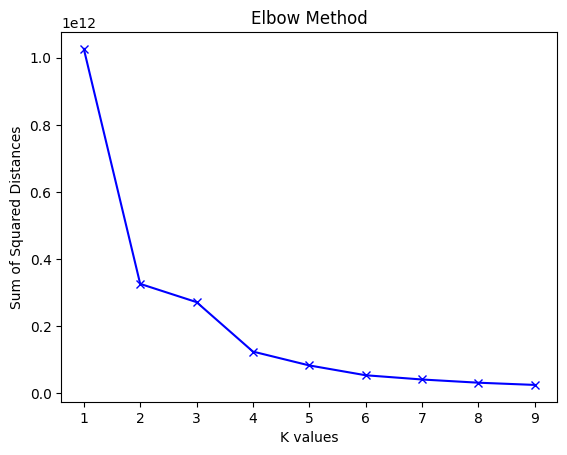

In [106]:
K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(X)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

Метод ліктя показує, що оптимальна к-ть кластерів = 4

In [107]:
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
s = metrics.silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Coefficient: {s:.2f}')

Silhouette Coefficient: 0.55


Метрика силуету майже не змінилася

In [108]:
X_vis = X.copy()
X_vis['ID'] = df['ID']
X_vis['Total_Spent'] = X_vis['MntWines'] + X_vis['MntMeatProducts'] + X_vis['MntFishProducts']
X_vis['Total_Purchases'] = X_vis['NumWebPurchases'] + X_vis['NumStorePurchases'] + X_vis['NumCatalogPurchases']

X_vis['Cluster'] = labels

fig = px.scatter_3d(
    X_vis,
    x='Income',
    y='Total_Spent',
    z='Total_Purchases',
    color='Cluster',
    size='Recency',
    hover_data=['ID']
)

fig.show()


**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте метрику силуету для цього методу кластеризації.

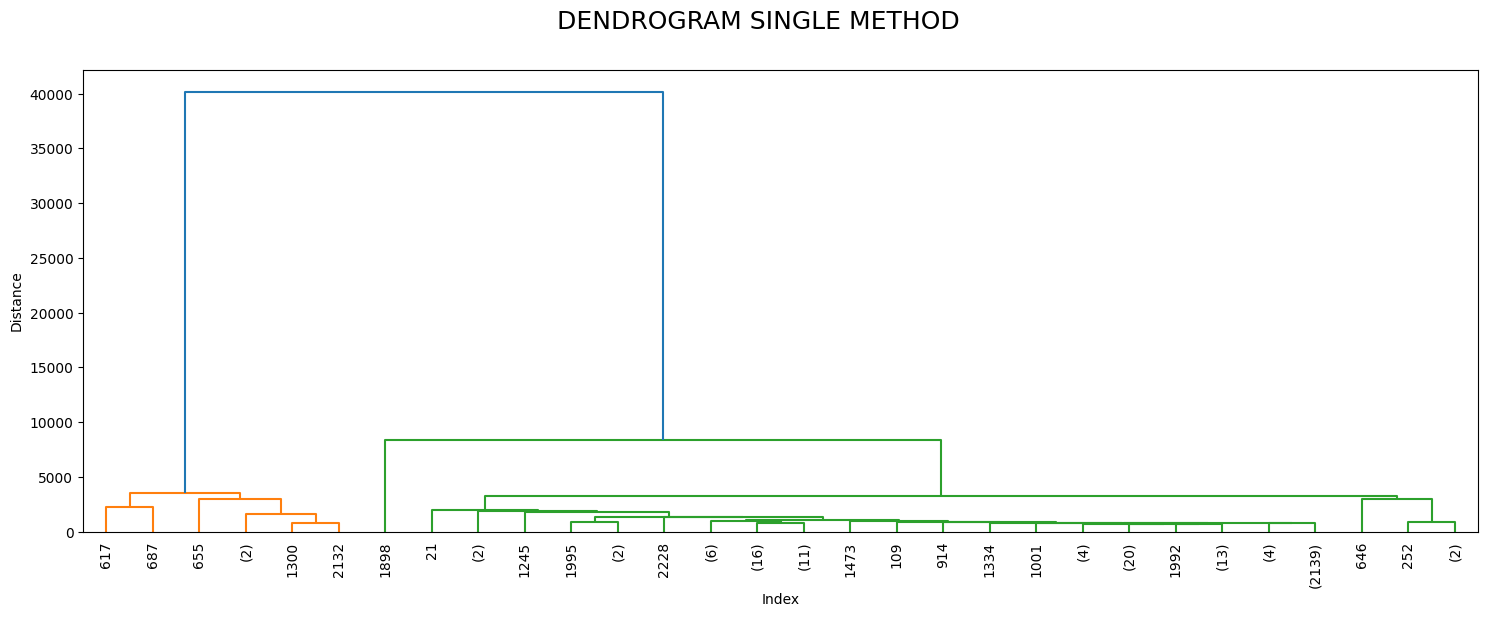

In [109]:
dist_sin = linkage(X, method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

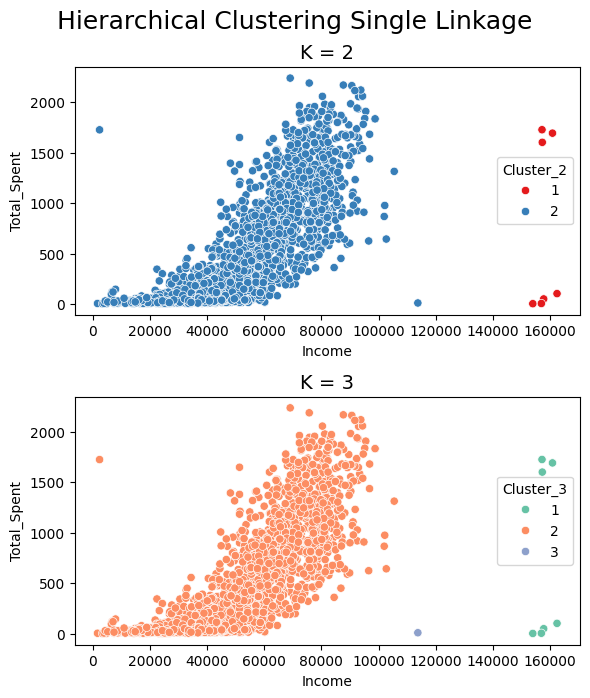

In [110]:
Z = linkage(X, method='single', metric='euclidean')
X_vis['Cluster_2'] = fcluster(Z, 2, criterion='maxclust')
X_vis['Cluster_3'] = fcluster(Z, 3, criterion='maxclust')
import seaborn as sns

plt.figure(figsize=(6,10))
plt.suptitle("Hierarchical Clustering Single Linkage", fontsize=18)

plt.subplot(3,1,1)
plt.title("K = 2", fontsize=14)
sns.scatterplot(
    x="Income",
    y="Total_Spent",
    data=X_vis,
    hue="Cluster_2",
    palette="Set1"
)

plt.subplot(3,1,2)
plt.title("K = 3", fontsize=14)
sns.scatterplot(
    x="Income",
    y="Total_Spent",
    data=X_vis,
    hue="Cluster_3",
    palette="Set2"
)

plt.tight_layout()
plt.show()


Обидві візуалізації не виглядають вдалими, оскільки є 1 великий кластер, який включає переважну більшість даних. При цьому, варіант із 2ма кластерами виглядає дещо краще, оскільки варіант із 3ма кластерами має один кластер, у якому всього один клієнт

In [111]:
clusters_2 = fcluster(dist_sin, 2, criterion='maxclust')
clusters_3 = fcluster(dist_sin, 3, criterion='maxclust')

s_2 = metrics.silhouette_score(X, clusters_2, metric='euclidean')
s_3 = metrics.silhouette_score(X, clusters_3, metric='euclidean')

print(f'Silhouette Coefficient for 2 clusters: {s_2:.2f}')
print(f'Silhouette Coefficient for 3 clusters: {s_3:.2f}')

Silhouette Coefficient for 2 clusters: 0.77
Silhouette Coefficient for 3 clusters: 0.56


Метрика силуету також краща для варіанту з двома кластерами

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте метрику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

In [112]:
dbscan = DBSCAN(eps=10000, min_samples=10)
dbscan.fit(X)
labels = dbscan.labels_
print(labels)

[0 0 0 ... 0 0 0]


In [113]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

s = metrics.silhouette_score(X, dbscan.labels_)
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Estimated number of clusters: 1
Estimated number of noise points: 7
Silhouette Coefficient for the data Dataset Clusters: 0.77


Метод DBSCAN не може бути використаний, оскільки формується лише один кластер (при різних гіперпараметрах `eps` i `min_samples`)